# Vizualizace dat s využitím knihovny Pandas

- Pandas nabízí jednoduchou integraci s knihovnou Matplotlib pro základní vizualizace dat pomocí metody `plot()`, která využívá sub-modul **Pyplot** knihovny Matplotlib (Matplotlib je samostatná knihovna pro vizualizace v Pythonu).
- Matplotlib je **knihovna pro vizualizaci na nízké úrovni**, což znamená, že umožňuje bohaté možnosti přizpůsobení grafů, ale může vyžadovat více nastavení.
- Metoda `plot()` v Pandas slouží k vytvoření různých typů vizualizací (např. čárové grafy, sloupcové grafy, bodové grafy).
    - **Argumenty**: `plot()` přijímá dva základní argumenty — první pro hodnoty na ose x, druhý pro hodnoty na ose y. Pokud není specifikována hodnota osy x, Pandas vygeneruje výchozí řadu indexů.
    - Typy grafů, které Matplotlib nabízí, naleznete [zde](https://matplotlib.org/stable/plot_types/index.html).
  
- Vizuály jsou vytvářeny v objektu **figure** (zkráceně **fig**), do kterého jsou následně přidávány jednotlivé grafy v podobě objektů **axes** (osy).

#### Dva režimy práce s Matplotlib

- **Stavový režim (Stateful)**: V tomto režimu je objekt figury vytvořen implicitně a veškeré operace se provádějí na tomto implicitním objektu. Není třeba explicitně vytvářet objekty figury nebo os. Tento režim je jednodušší a často se používá v rychlých vizualizacích nebo interaktivních prostředích (např. Jupyter Notebook).
  
- **Bezstavový režim (Stateless)**: Tento režim vyžaduje explicitní vytvoření objektu **figure** a práce s ním pomocí volání metod. Tento přístup je vhodnější pro pokročilé formátování a přizpůsobení grafů. Umožňuje větší kontrolu nad rozložením grafů, osami a dalšími prvky grafu.

#### Fig (Figura)
- Objekt **figure** představuje okno nebo kontejner, do kterého jsou přidávány grafy.
- Vytvoření objektu figury se provádí pomocí metody `figure()` z modulu `pyplot`.
- Parametry figury mohou zahrnovat velikost (`figsize`), rozlišení (`dpi`), rozložení atd.

#### Axes (Osy)
- Objekt **axes** představuje skutečný graf uvnitř figury, kde se vykreslují data.
- Objekt osy lze vytvořit pomocí metody `subplot()` nebo `add_subplot()` z modulu `pyplot`. Každý objekt axes má své vlastní osy x a y.
- Pokročilé formátování os (např. změna měřítka, popisky, rozsah os) lze provádět přes tento objekt.
- Metoda `subplot2grid()` umožňuje vytvořit mřížku více grafů v rámci jedné figury, což usnadňuje zobrazení více grafů najednou ve zvoleném rozložení.

### Typy grafů, které lze vytvořit pomocí Pandas a Matplotlib:
- **Čárový graf** (výchozí typ)
- **Sloupcový graf**
- **Bodový graf (scatter plot)**: Užívá se k vizualizaci vztahu mezi dvěma proměnnými.
- **Histogram**: Vhodný pro zobrazení distribuce dat.




In [2]:
import pandas as pd

# Stazeni .csv souboru publikovaneho na github.com
url = "https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv"
df = pd.read_csv(url,delimiter = ';')
# Filtrovani dataframe (je vysvetleno pozdeji)
df['DATE']  = pd.to_datetime(df['DATE'])
df.reset_index(inplace=True)



<Axes: xlabel='DATE'>

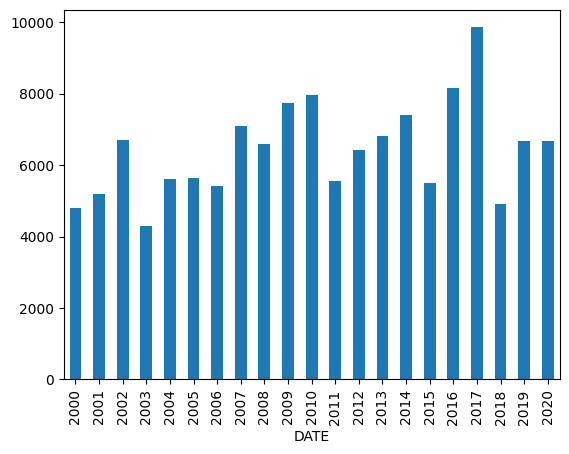

In [3]:
# Vytvoreni dataframe pro vizualizaci
df_yearly = df.groupby(df['DATE'].dt.year)['PRCP'].sum()
df_yearly.plot(kind='bar',y='PRCP')
# Zobrazeni grafu


<BarContainer object of 7601 artists>

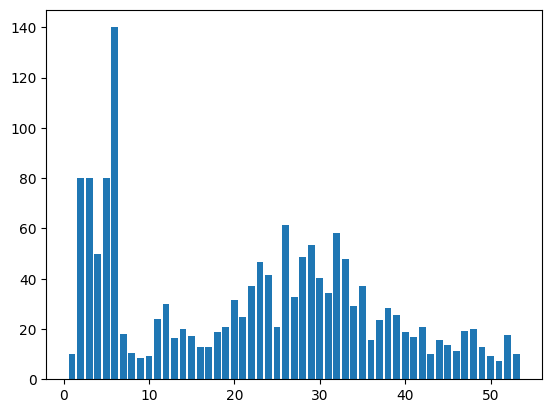

In [3]:
from matplotlib import pyplot as plt
import pandas as pd

# Stazeni .csv souboru publikovaneho na github.com
url = "https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv"
df = pd.read_csv(url,delimiter = ';')
# Filtrovani dataframe (je vysvetleno pozdeji)
df = df.loc[df['NAME']== 'RUZYNE'][['DATE','PRCP']]
df['DATE']  = pd.to_datetime(df['DATE'])
df['MESIC'] = df['DATE'].dt.month
df['ROK'] = df['DATE'].dt.year
df['TYDEN'] = df['DATE'].dt.isocalendar().week
df['DATUM'] = df['DATE'].dt.strftime('%Y/%m')

df2 = df.copy()
df2 = df2.groupby(by=['ROK','TYDEN'],as_index=False)['PRCP'].sum()
df2 = df2.groupby(by=['TYDEN'],as_index=False)['PRCP'].mean()
df2 = df2[df2['TYDEN']<53]
plt.bar(df['TYDEN'],df['PRCP'])


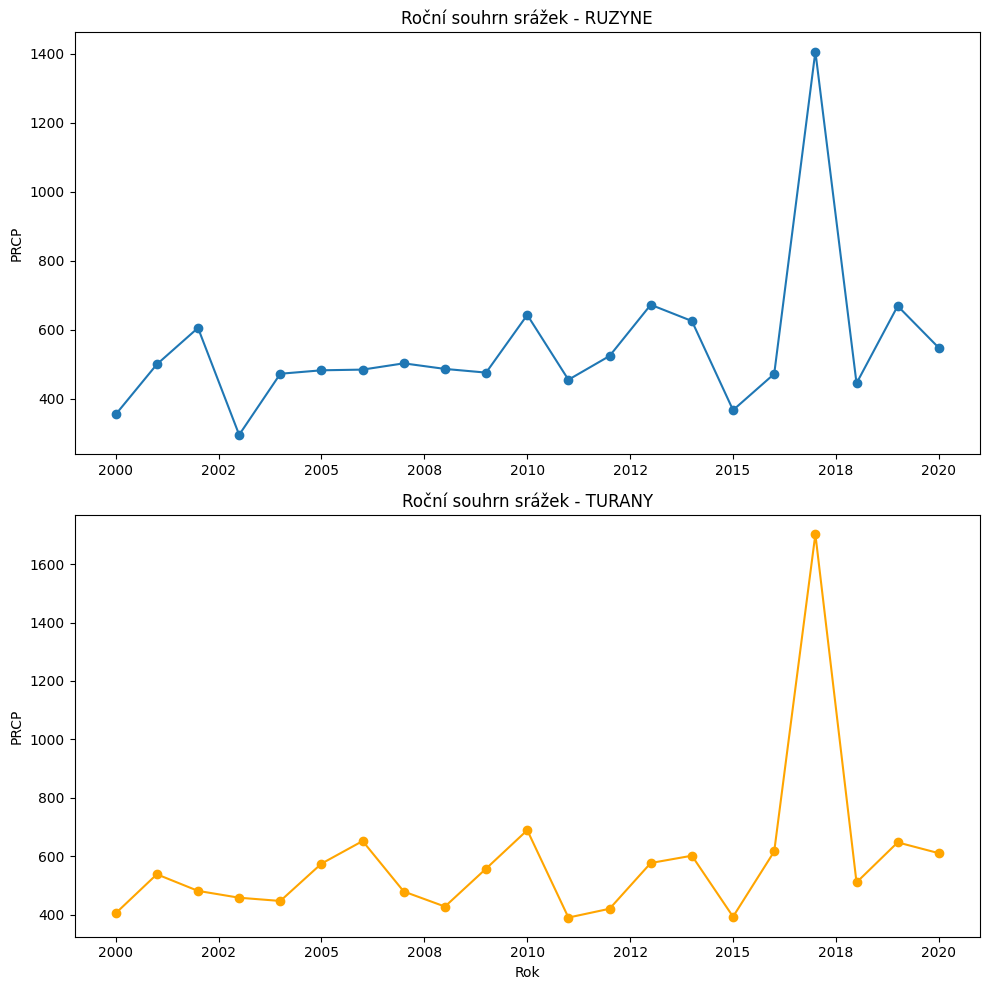

In [9]:
# Načtení dat s použitím středníku jako oddělovače

# Stazeni .csv souboru publikovaneho na github.com
url = "https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv"
df = pd.read_csv(url,delimiter = ';')
df['DATE']  = pd.to_datetime(df['DATE'])
# Skupina podle data a jména, a sečtení srážek

df_yearly = df.groupby([df['DATE'].dt.year, 'NAME'])['PRCP'].sum().reset_index()

# Vytvoření grafu pro RUZYNE a TURANY
fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=False)

# Graf pro RUZYNE
ax[0].plot(df_yearly[df_yearly['NAME'] == 'RUZYNE']['DATE'],
           df_yearly[df_yearly['NAME'] == 'RUZYNE']['PRCP'],
           marker='o', label='RUZYNE')
ax[0].set_title('Roční souhrn srážek - RUZYNE')
ax[0].set_ylabel('PRCP')

# Graf pro TURANY
ax[1].plot(df_yearly[df_yearly['NAME'] == 'TURANY']['DATE'],
           df_yearly[df_yearly['NAME'] == 'TURANY']['PRCP'],
           marker='o', color='orange', label='TURANY')
ax[1].set_title('Roční souhrn srážek - TURANY')
ax[1].set_xlabel('Rok')
ax[1].set_ylabel('PRCP')
# Nastavení formátu osy x pro zobrazení pouze celých čísel
ax[0].xaxis.set_major_formatter('{:.0f}'.format)
ax[1].xaxis.set_major_formatter('{:.0f}'.format)

# Zobrazení grafu
plt.tight_layout()
plt.show()


## Cvičení 1 zadání

1. Z dat dostupných pod touto URL vytvořte DataFrame s názvem `df`: ['https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv'](https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv)
2. Upravte datový typ sloupce `DATE` na `datetime`.
3. Přidejte do `df` sloupce `YEAR` a `MONTH`.
4. Filtrujte `df` na `YEAR == 2000` a `NAME == 'RUZYNE'`.
5. Spočítejte si sloupec `CUMSUM` s kumulativní sumou srážek.
6. Vizualizujte spojnicový graf, na ose X sloupec `MONTH`, v hodnotách sloupec `CUMSUM`.



## Cvičení 2 zadání

1. Z dat dostupných pod touto URL vytvořte DataFrame s názvem `df`: ['https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv'](https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv)
2. Upravte datový typ sloupce `DATE` na `datetime`.
3. Přidejte do `df` sloupec `YEAR`.
4. Filtrujte `df` na `NAME == 'RUZYNE'`.
5. Agregujte `df` dle `YEAR`, agregovaná hodnota je `PRCP`, funkce `sum`.
6. Vytvořte sloupec `COLOR` s hodnotou `RED`, pokud je suma `PRCP` v daném roce nižší než průměrná roční suma `PRCP`, jinak hodnota `CYAN`.
7. Za pomoci `matplotlib.pyplot.bar` vizualizujte sloupcový (bar) graf, na ose X `YEAR`, na ose Y agregované `PRCP`, do atributu `color` přidejte sloupec `COLOR`.
8. Za pomoci `matplotlib.pyplot.plot` vizualizujte spojnicový graf, na ose X `YEAR`, na ose Y průměrné roční srážky.
9. Uložte fig do .png
